# Machine Learning
## 1.1 Data preparation
You have been provided with datasets relating to glass. Your task is to train and assess classification models that predict the type of glass based on 9 inputs.

You must complete the following tasks:
## Task 1.1 – Data preparation (10% of total mark)
The first phase of the work requires you to load the data you have been provided with into your
selected program. Before the data can be used to train and test your models you must first
prepare it – this means that the inputs must be converted to a suitable format. There is no missing
data in the dataset.
## Task 1.2 – Classification (20% of total mark)
Having prepared the data you must now build a classification tool that can predict new points. Use
the following regression implementations within the respective program packages to construct
predictors for the dataset:

• kNN

• SVM

For each of the models, you must investigate the optimal number of neighbours and an appropriate kernel shape from linear, polynomial and radial. You must demonstrate that each classifier can provide a prediction for a given input.

Note: for the polynomial kernel, restrict your investigation to polynomials of degree 2 and 3. 

## Task 1.3 – Assessment of classification (20% of total mark)
After identifying the best model parameters in the previous task, the classification models you
have implemented must be assessed. To do this you are required to assess the accuracy for each
model.

You may use the accuracy implementation available to do this. It is not sufficient to report a
single accuracy score. You must use cross-validation to report training results and report these
values using a plot. You will also need to write a summary analysing your results and findings

## Imports 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


##  1.1 Data preparation

In [ ]:
data = pandas.read_csv("glass_dataset.csv")
# Inputs is features, Data is the whole dataset, Targets is the labels
targets = data["Type"] # Label of the type of glass (1-7)
inputs = data.drop("Type", axis=1) # Features of the glass

In [ ]:
print(data.head())  
print(data.columns)  
print(inputs.isnull().sum())  # Ensure no missing values
print("targets", targets)
print("inputs", inputs)

## 1.2 Classifcation 

In [110]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)

In [111]:
compressed = PCA(n_components=2).fit_transform(scaled_inputs) # given it has 9 features, higher dimensions might be useful

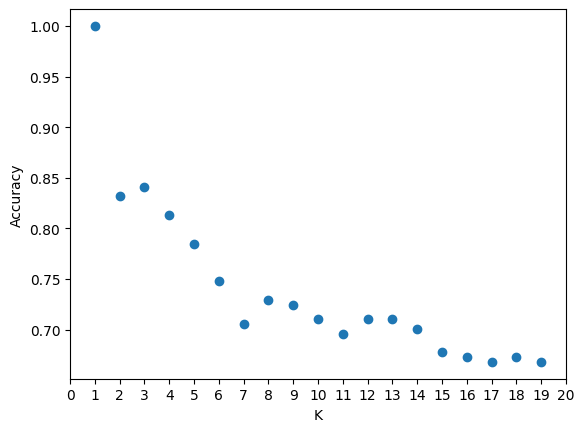

In [112]:
k_range = range (1,20)
scores = []
for k in k_range :
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit (scaled_inputs,targets)
    scores.append (knn.score(scaled_inputs,targets))
plt.figure()
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.scatter(k_range,scores)
plt.xticks([0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 , 12 ,13 ,14 , 15 ,16 ,17 ,18 ,19 , 20]) ;
plt.savefig ("knnloop.png", bbox_inches ="tight")
plt.show()

In [113]:
k_classifier = KNeighborsClassifier(n_neighbors=1).fit(scaled_inputs,targets)
classified_data = k_classifier.predict(scaled_inputs)

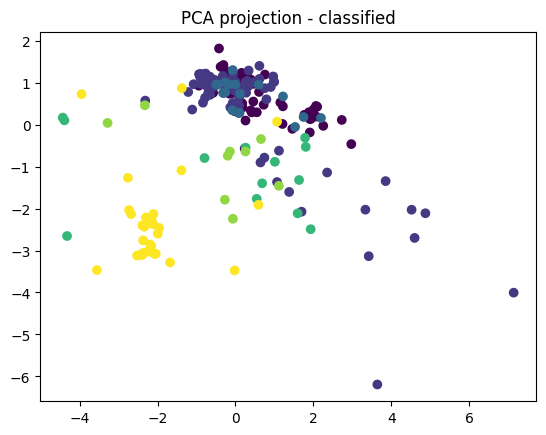

In [114]:
plt.figure()
plt.scatter(compressed [:,0], compressed [:,1], c=classified_data, cmap='viridis')
plt.title("PCA projection - classified")
plt.savefig("glass_pca_classified.png", bbox_inches ="tight")
plt.show()


In [115]:
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)

In [ ]:
svm_classifier = SVC(kernel="poly", degree= 3, gamma=2.35).fit(x_train,t_train) # a gamma value any higher than 2.35 no increase in accuracy 
y_train = svm_classifier.predict(x_train)
y_test = svm_classifier.predict(x_test) 

In [ ]:
train_accuracy = accuracy_score(t_train,y_train)
test_accuracy = accuracy_score(t_test,y_test)
print (f"{train_accuracy} training accuracy, {test_accuracy} testing accuracy ")
# 0.75 training accuracy, 0.6666666666666666 testing accuracy (rbf)
# 0.61875 training accuracy, 0.7037037037037037 testing accuracy  (ploy, 2)
# 0.55 training accuracy, 0.6111111111111112 testing accuracy (linear)
# 0.55 training accuracy, 0.6111111111111112 testing accuracy (sigmoid)
# 0.59375 training accuracy, 0.6481481481481481 testing accuracy (ploy, 3)


0.59375 training accuracy, 0.6481481481481481 testing accuracy 


## 1.3 Assessment of classification